## Observations and Insights 

##### 1. Ramicane, Capomulin, Infubinol & Ceftamin were among the potential treatments for squamous cell carcinoma (SCC), a commonly occuring skin cancer. Based on the data, these treatments have the lowest standard deviations compared to the rest of the other 6 treatments. However, Ramicane (standard deviation of 4.85) and Capomulin (standard deviation of 4.99) were the most preferred treatments because they have a significantly lower standard deviation compared to Infubinol and Ceftamin. Standar deviation is a measure of variations of data from the mean. A small standard deviation translates into lesser risk because the the data are clustered closely around the mean and the variability is low. Therefore, this study suggested that Ramicane and Capomulin were drug regimens with very low risk & the most effective & reliable in reversing tumor growth in mice.

##### 2. The stacked graph of Mice Participation by Timepoints for each Drug Regimen showed that the total number of mice decreases as it reaches the 45th day, from 250 mice on the beginning of the study when measurements of tumor volumes were recorded to approximately 140 mice on the 45th day. The graph also showed no significant changes in the number of mice treated with Ramicane and Capomulin for each time observations. It appeared that there were total of 50 mice treated with both regimens in the beginning (time 0) and still ended up with 50 mice on the 45th day. Therefore, it can be concluded that the tumor volumes of mice being treated has gotten smaller over time, which again shows a strong indication that these drug regimens yield the most effective results.

##### 3. The box and whiskers plot resulted to 1 outlier from Ramicane and 1 outlier from Capomulin. In reference to the 2nd observation above, it can be assumed that the general trend of the majority of the mice treated with these regimens experienced decline in tumor volume over time. Both outliers showed a material improvement in the measurement of tumor volume, which was the expected result to be able to conclude that the data fits in to the general trend. It can be assumed that these two mice had a great physiological reaction to both regimens that it had significantly reversed the growth of their tumors. I would be more concerned if the outlier is above the 3rd Quartile, which would mean that the tumor volume increased and therefore wouldn't fit the general trend. 

##### 4. Based on the the pearson r of 0.95 obtained from the correlation coefficient of the regression line in Capomulin, there is a strong and positive relationship between the weight of the mice and the growth of the tumor volume. As the scatter plot shows, the heavier the mouse, the bigger the tumor volume. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy import stats
plt.style.use('seaborn')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combines the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

C:\Users\jabuk\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Checks the total number of mice in rawdata
len(mouse_study_df["Mouse ID"].unique())

249

In [3]:
# Finds the mice with duplicated Mouse ID and Timepoint 
id_duplicates = mouse_study_df.duplicated(["Mouse ID", "Timepoint"], keep=False)

# Filters for duplicated mouse ID
duplicate_mice = mouse_study_df.loc[id_duplicates, :]

In [4]:
#Finds the index location of duplicate Mice ID
dup_miceID = duplicate_mice["Mouse ID"].unique()
dup_miceID[0]

'g989'

In [5]:
# Excludes the duplicate mouse from the data using the Mouse ID index location above
duplicate_mouseID = mouse_study_df['Mouse ID']!= dup_miceID[0]

#Creates a clean df without any duplicates
clean_data = mouse_study_df.loc[duplicate_mouseID, :]

In [6]:
# Checks the number of mice in the clean df to make sure duplicate was deleted
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics of the Tumor Volume for each Drug Regimen
#### Table of mean, median, variance, standard deviation and SEM

In [7]:
#Creates a MEAN series grouped by Drug Regimen
avg_DRgroup = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()

In [8]:
#Creates a MEDIAN series grouped by Drug Regimen
median_DRgroup = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()

In [9]:
#Creates VARIANCE series grouped by Drug Regimen
var_DRgroup = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()

In [10]:
#Creates a STD DEV series grouped by Drug Regimen
STD_DRgroup = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()

In [11]:
#Creates an SEM series grouped by Drug Regimen
SEM_DRgroup = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

In [12]:
# Combines all series created to produce a df with all summary statistics (EASY METHOD)
Tumor_Volume_stats = {
    "Mean": avg_DRgroup, 
    "Median": median_DRgroup,
    "Variance": var_DRgroup,
    "Standard Deviation": STD_DRgroup,
    "SEM": SEM_DRgroup
}

#Creates summary dataframe that includes dictionary of stats
TV_Stats = pd.DataFrame(Tumor_Volume_stats)
TV_Stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
#Summary Statistics using groupby function (SHORTER/CLEANER METHOD)
TV_Stats_groupby = clean_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

## Bar Plots (using PANDAS & MATPLOTLIB)

### >> BAR Plotting in PANDAS 

In [14]:
#Shows index locations of each drug regimen
index_DR = clean_data['Drug Regimen'].value_counts().index

In [15]:
#Treatment A = Capomulin
#Filters the number of mice treated by Capomulin per timepoint
treatmentA = clean_data['Drug Regimen']== index_DR[0]
filterA = clean_data.loc[treatmentA, :]
Capomulin = filterA.groupby(["Timepoint"])['Mouse ID'].count()

#NOTE: Capomulin above returns a series, which cannot be used for plotting
#Returns an array type values of Capomulin (used in .plot)
Capomulin_counts = Capomulin.values

In [16]:
#Treatment B = Ramicane
#Filters the number of mice treated by Ramicane per timepoint
treatmentB = clean_data['Drug Regimen']== index_DR[1]
filterB = clean_data.loc[treatmentB, :]
Ramicane = filterB.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Ramicane, which is used in .plot
Ramicane_counts = Ramicane.values

In [17]:
#Treatment C = Ketapril
#Filters the number of mice treated by Ketapril per timepoint
treatmentC = clean_data['Drug Regimen']== index_DR[2]
filterC = clean_data.loc[treatmentC, :]
Ketapril = filterC.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Ramicane, which is used in .plot
Ketapril_counts = Ketapril.values

In [18]:
#Treatment D = Naftisol
#Filters the number of mice treated by Naftisol per timepoint
treatmentD = clean_data['Drug Regimen']== index_DR[3]
filterD = clean_data.loc[treatmentD, :]
Naftisol = filterD.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Naftisol, which is used in .plot
Naftisol_counts = Naftisol.values

In [19]:
#Treatment E = Zoniferol
#Filters the number of mice treated by Zoniferol per timepoint
treatmentE = clean_data['Drug Regimen']== index_DR[4]
filterE = clean_data.loc[treatmentE, :]
Zoniferol = filterE.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Zoniferol, which is used in .plot
Zoniferol_counts = Zoniferol.values

In [20]:
#Treatment F = Stelasyn
#Filters the number of mice treated by Stelasyn per timepoint
treatmentF = clean_data['Drug Regimen']== index_DR[5]
filterF = clean_data.loc[treatmentF, :]
Stelasyn = filterF.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Stelasyn, which is used in .plot
Stelasyn_counts = Stelasyn.values

In [21]:
#Treatment G = Placebo
#Filters the number of mice treated by Placebo per timepoint
treatmentG = clean_data['Drug Regimen']== index_DR[6]
filterG = clean_data.loc[treatmentG, :]
Placebo = filterG.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Placebo, which is used in .plot
Placebo_counts = Placebo.values

In [22]:
#Treatment H = Ceftamin
#Filters the number of mice treated by Ceftamin per timepoint
treatmentH = clean_data['Drug Regimen']== index_DR[7]
filterH = clean_data.loc[treatmentH, :]
Ceftamin = filterH.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Ceftamin, which is used in .plot
Ceftamin_counts = Ceftamin.values

In [23]:
#Treatment I = Infubinol
#Filters the number of mice treated by Infubinol per timepoint
treatmentI = clean_data['Drug Regimen']== index_DR[8]
filterI = clean_data.loc[treatmentI, :]
Infubinol = filterI.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Infubinol, which is used in .plot
Infubinol_counts = Infubinol.values

In [24]:
#Treatment J = Propriva
#Filters the number of mice treated by Propriva per timepoint
treatmentJ = clean_data['Drug Regimen']== index_DR[9]
filterJ = clean_data.loc[treatmentJ, :]
Propriva = filterJ.groupby(["Timepoint"])['Mouse ID'].count()

#Returns an array type values of Propriva, which is used in .plot
Propriva_counts = Propriva.values

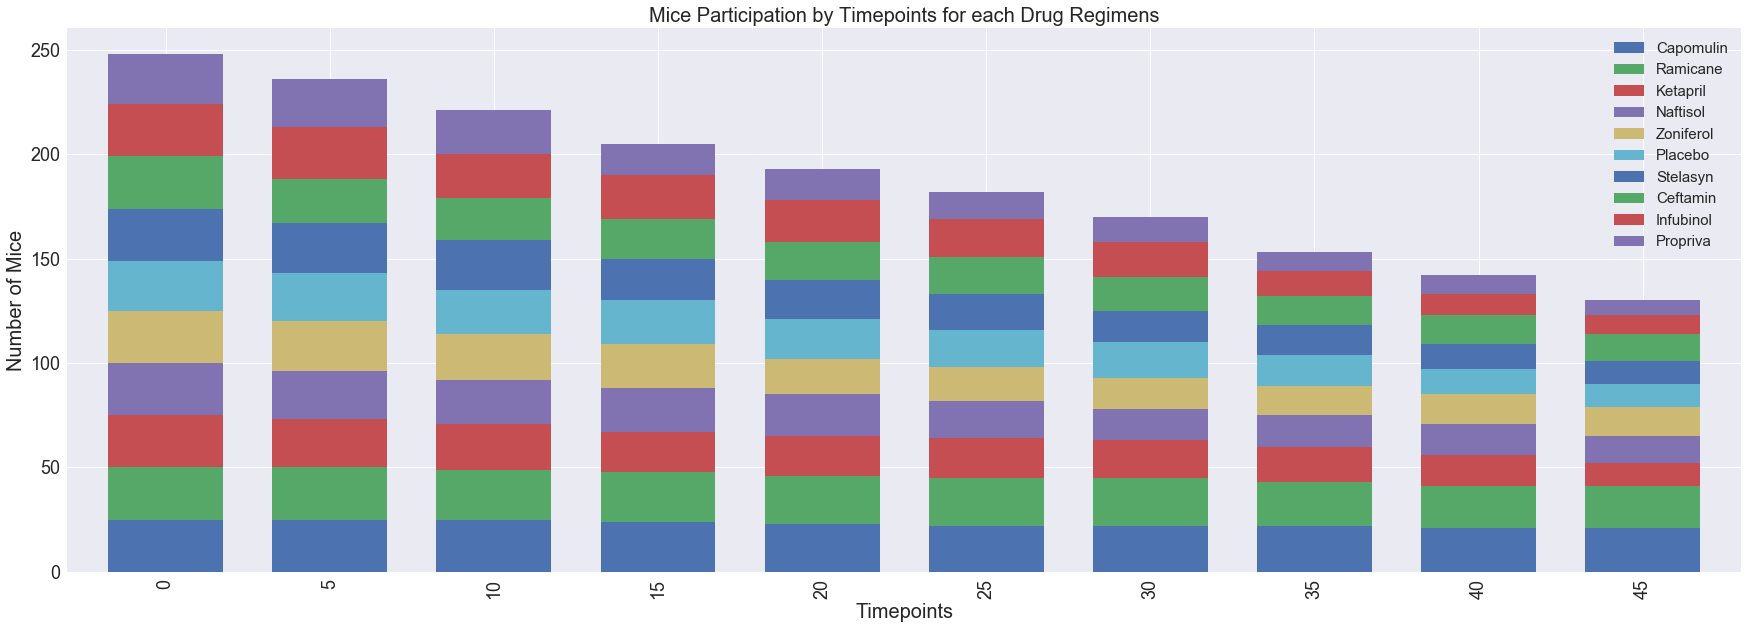

In [25]:
#Set labels for x-axis (STACKED VERSION)
# I thought that this was a good version since: 1st: looks better visually and 2nd: it also shows the total number of mice participation for each timepoint. 
# It helps to see the drop in the total mice participation as the time increases
labels = ['0', '5', '10', '15', '20', '25', '30', '35', '40', '45']

#Create df
mice_pertimepts_byDR = pd.DataFrame({ 
    'Timepoints': labels, 
    'Capomulin': Capomulin_counts,
    'Ramicane': Ramicane_counts,
    'Ketapril': Ketapril_counts,
    'Naftisol': Naftisol_counts,
    'Zoniferol': Zoniferol_counts,
    'Placebo': Placebo_counts,
    'Stelasyn': Stelasyn_counts,
    'Ceftamin': Ceftamin_counts,
    'Infubinol': Infubinol_counts,
    'Propriva': Propriva_counts    
}) 
#Plot the graph
mice_pertimepts_byDR.plot(kind= 'bar', x='Timepoints', 
                          y=['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol','Placebo', 'Stelasyn', 'Ceftamin','Infubinol', 'Propriva'],
                          width= 0.70, fontsize=18, stacked=True, figsize=(30, 10)) 

#Adds titles, axis labels, and legend with modifications in font sizes (did plt since .plot doesn't fix fontsize)
plt.title('Mice Participation by Timepoints for each Drug Regimens', fontsize=20)
plt.xlabel('Timepoints', fontsize=20)
plt.ylabel('Number of Mice', fontsize=20)
plt.legend(fontsize=15)

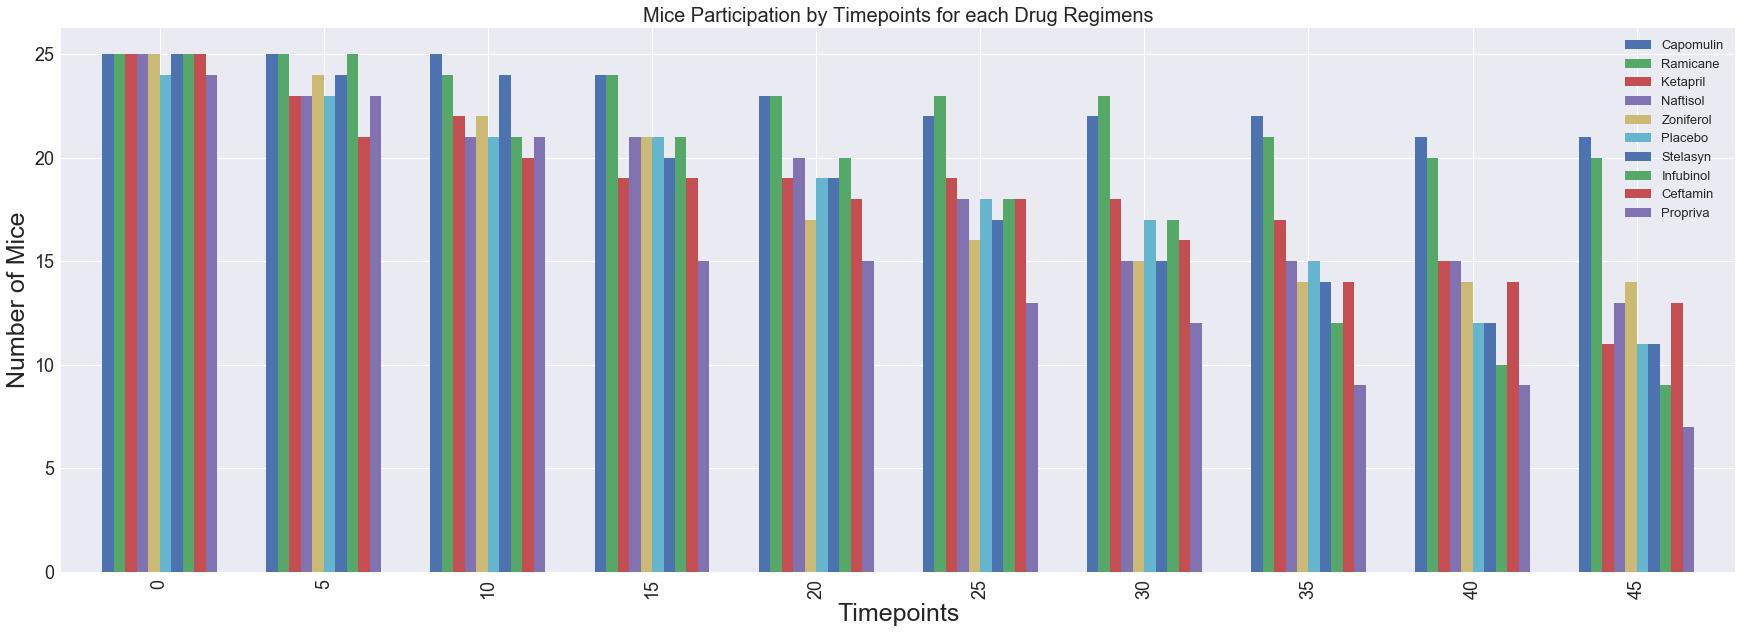

In [26]:
#Plot the graph (UNSTACKED VERSION)
mice_pertimepts_byDR.plot(kind= 'bar', x='Timepoints', 
                          y=['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol','Placebo', 'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva'],
                          width= 0.70, fontsize=18, figsize=(30, 10)) 

#Adds titles, axis labels, and legend with modifications in font sizes (did plt since .plot doesn't fix fontsize)
plt.title('Mice Participation by Timepoints for each Drug Regimens', fontsize=20)
plt.xlabel('Timepoints', fontsize=25)
plt.ylabel('Number of Mice', fontsize=25)
plt.legend(fontsize=13)

### >> BAR Plotting in MATPLOTLIB 

In [27]:
#Returns all unique timepoint values as an array ~ to be used for x-axis labels
time_points = clean_data['Timepoint'].unique()

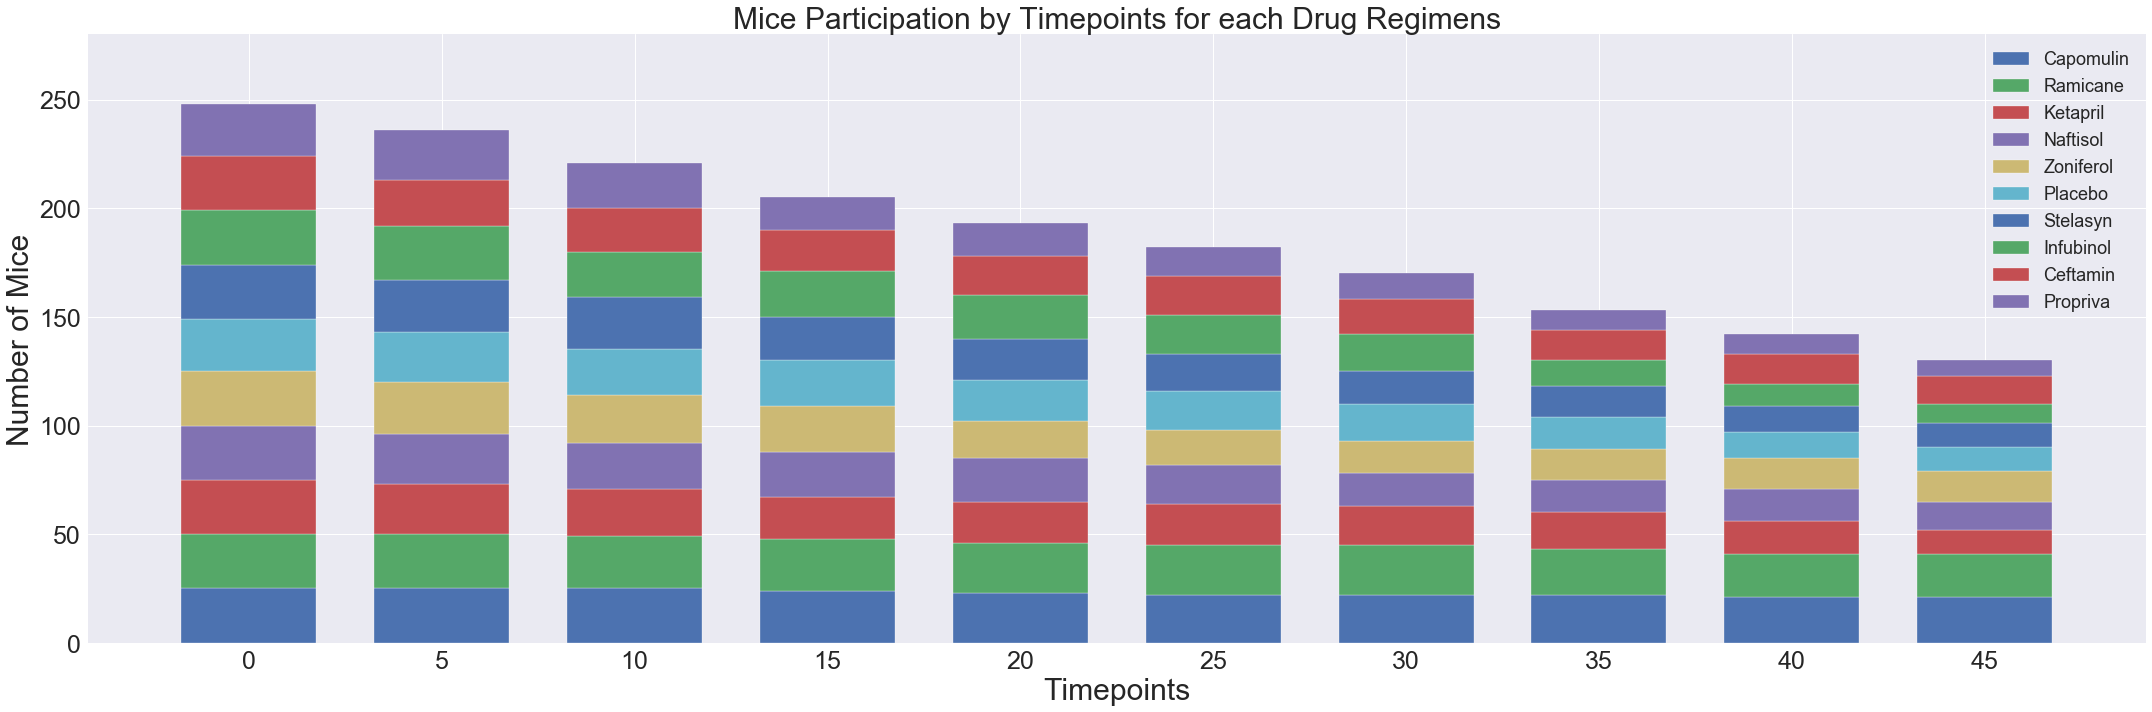

In [28]:
#Sets figure and bar size first before plotting
plt.figure(figsize=(30,10))
width_bar = 0.70

# x-axis 
one_timepoint = np.arange(len(time_points))

#Set stacked bar locations
bar_data1 = Capomulin_counts
bar_data2 = bar_data1 + Ramicane_counts
bar_data3 = bar_data2 + Ketapril_counts
bar_data4 = bar_data3 + Naftisol_counts
bar_data5 = bar_data4 + Zoniferol_counts
bar_data6 = bar_data5 + Placebo_counts
bar_data7 = bar_data6 + Stelasyn_counts
bar_data8 = bar_data7 + Infubinol_counts
bar_data9 = bar_data8 + Ceftamin_counts
bar_data10 = bar_data9 + Propriva_counts

#Plot data
plt.bar(one_timepoint, bar_data1, width_bar, edgecolor='white', label="Capomulin")
plt.bar(one_timepoint, Ramicane_counts, width_bar, bottom = bar_data1, edgecolor='white', label="Ramicane")
plt.bar(one_timepoint, Ketapril_counts, width_bar, bottom = bar_data2, edgecolor='white', label="Ketapril")
plt.bar(one_timepoint, Naftisol_counts, width_bar, bottom = bar_data3, edgecolor='white', label="Naftisol")
plt.bar(one_timepoint, Zoniferol_counts, width_bar, bottom = bar_data4, edgecolor='white', label="Zoniferol")
plt.bar(one_timepoint, Placebo_counts, width_bar, bottom = bar_data5, edgecolor='white', label="Placebo")
plt.bar(one_timepoint, Stelasyn_counts, width_bar, bottom = bar_data6, edgecolor='white', label="Stelasyn")
plt.bar(one_timepoint, Infubinol_counts, width_bar, bottom = bar_data7, edgecolor='white', label="Infubinol")
plt.bar(one_timepoint, Ceftamin_counts, width_bar, bottom = bar_data8, edgecolor='white', label="Ceftamin")
plt.bar(one_timepoint, Propriva_counts, width_bar, bottom = bar_data9, edgecolor='white', label="Propriva")

#Adds titles, axis labels, and legend with modifications in font sizes. Also fixes the range of y axis.
plt.title('Mice Participation by Timepoints for each Drug Regimens', fontsize=30)
plt.xlabel('Timepoints', fontsize=30)
plt.ylabel('Number of Mice', fontsize=30)
plt.yticks(fontsize=25)
plt.xticks(one_timepoint, labels, fontsize=25)
plt.legend(fontsize=18)
plt.ylim(0,280)

plt.tight_layout()
plt.show()

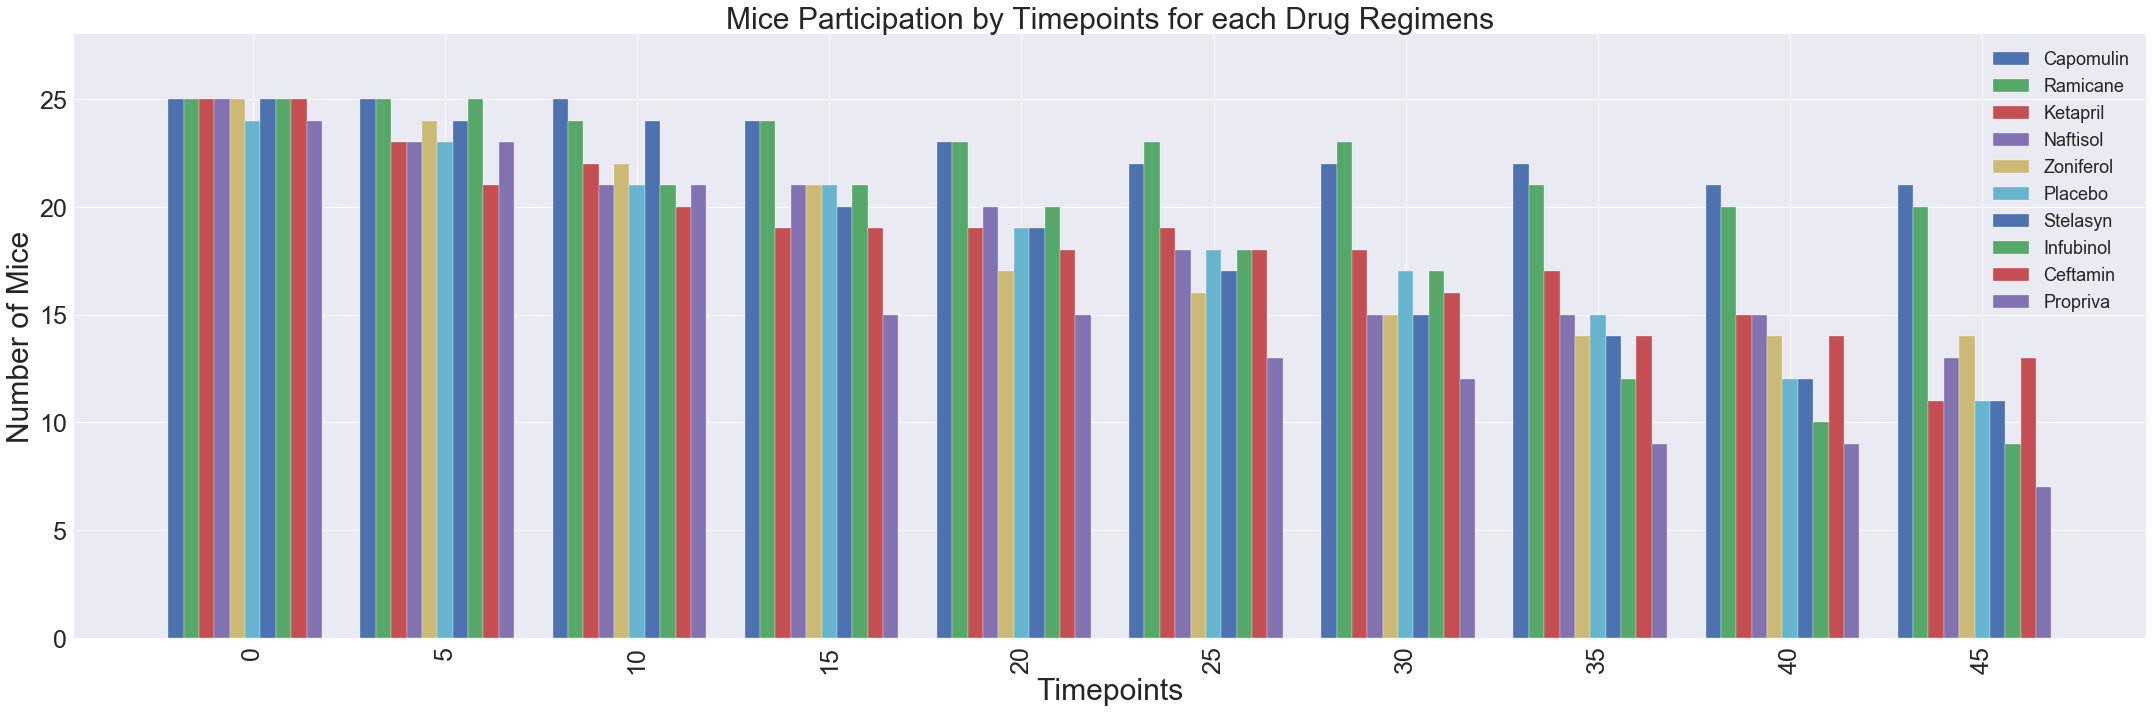

In [29]:
#Sets figure and bar size first before plotting
plt.figure(figsize=(30,10))
width_bar = 0.08

#loop to position bar graphs
bar1_cap = np.arange(len(time_points)) 
bar2_ram = [i+width_bar for i in bar1_cap]
bar3_ket = [i+width_bar for i in bar2_ram]
bar4_naf = [i+width_bar for i in bar3_ket]
bar5_zon = [i+width_bar for i in bar4_naf]
bar6_pla = [i+width_bar for i in bar5_zon]
bar7_ste = [i+width_bar for i in bar6_pla]
bar8_inf = [i+width_bar for i in bar7_ste]
bar9_cef = [i+width_bar for i in bar8_inf]
bar10_pro = [i+width_bar for i in bar9_cef]

#plotting each bars
plt.bar(bar1_cap, Capomulin_counts, width_bar, edgecolor='white', label="Capomulin")
plt.bar(bar2_ram, Ramicane_counts, width_bar, edgecolor='white', label="Ramicane")
plt.bar(bar3_ket, Ketapril_counts, width_bar, edgecolor='white', label="Ketapril")
plt.bar(bar4_naf, Naftisol_counts, width_bar, edgecolor='white', label="Naftisol")
plt.bar(bar5_zon, Zoniferol_counts, width_bar, edgecolor='white', label="Zoniferol")
plt.bar(bar6_pla, Placebo_counts, width_bar, edgecolor='white', label="Placebo")
plt.bar(bar7_ste, Stelasyn_counts, width_bar, edgecolor='white', label="Stelasyn")
plt.bar(bar8_inf, Infubinol_counts, width_bar, edgecolor='white', label="Infubinol")
plt.bar(bar9_cef, Ceftamin_counts, width_bar, edgecolor='white', label="Ceftamin")
plt.bar(bar10_pro, Propriva_counts, width_bar, edgecolor='white', label="Propriva")

#Adds titles, axis labels, and legend with modifications in font sizes. Also fixes the range of y axis.
plt.title('Mice Participation by Timepoints for each Drug Regimens', fontsize=30)
plt.xlabel('Timepoints', fontsize=30)
plt.ylabel('Number of Mice', fontsize=30)
plt.legend(fontsize=18)
plt.ylim(0,28)

#Set tick location to center
tick_locations = [value+0.4 for value in bar1_cap]
plt.xticks(tick_locations, time_points, rotation="vertical", fontsize=25)
plt.yticks(fontsize=25)

plt.tight_layout()
plt.show()

## Pie Plots 

#### >> PANDAS

In [30]:
#Groups data by gender
gender_group = clean_data.groupby(["Sex"])

Text(0, 0.5, '')

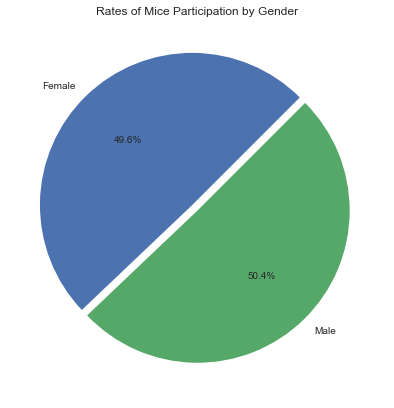

In [31]:
# Generates the number of female versus male mice
unique_count = gender_group['Mouse ID'].nunique()

#Plots pie plot
unique_count.plot(kind='pie', title='Rates of Mice Participation by Gender', autopct='%1.1f%%', figsize=(7, 7), explode= (0.05, 0), startangle=45)
plt.ylabel('')

#### >> MATPLOTLIB

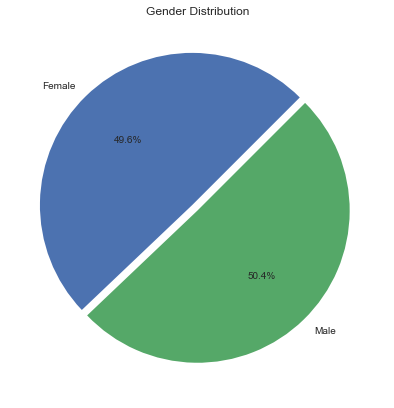

In [32]:
# Graph aesthetics
plt.figure(figsize=(7, 7))
explode = (0.05, 0)
plt.title('Gender Distribution')

#Plots  graph
plt.pie(unique_count, labels=['Female','Male'], explode=explode, autopct="%1.1f%%", startangle=45)

plt.show()

## Quartiles, Outliers and Boxplots

#### Calculations of IQRs of 4 Top Drug Regimens: Capomulin, Ceftamin, Infubinol and Ramicane

In [33]:
#Sets the condition to look at the top 4 Drug Regimens
#Filters data to look at these drug regimens only (with ALL TIMEPOINTS)
best_treatments = treatmentA | treatmentH | treatmentI | treatmentB
bestDR_byTVols = clean_data.loc[best_treatments,
    ["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Weight (g)"]
]
bestDR_byTVols

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Weight (g)
0,Ramicane,k403,0,45.000000,16
1,Ramicane,k403,5,38.825898,16
2,Ramicane,k403,10,35.014271,16
3,Ramicane,k403,15,34.223992,16
4,Ramicane,k403,20,32.997729,16
...,...,...,...,...,...
1868,Infubinol,z581,25,54.316407,25
1869,Infubinol,z581,30,56.286750,25
1870,Infubinol,z581,35,58.628399,25
1871,Infubinol,z581,40,60.053740,25


In [34]:
#Filters the current df with top 4 Drug Regimens to include only the last observed timepoint, which is timepoint 45
final_timept = bestDR_byTVols.loc[bestDR_byTVols["Timepoint"] == time_points.max(), 
                                ["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]
                               ]
final_timept

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Weight (g)
9,Ramicane,k403,22.050126,16
19,Capomulin,s185,23.343598,17
29,Capomulin,x401,28.484033,15
39,Capomulin,m601,28.430964,17
49,Ramicane,g791,29.128472,16
...,...,...,...,...
1797,Ceftamin,x822,61.386660,29
1813,Infubinol,y163,67.685569,27
1845,Ceftamin,y769,68.594745,27
1855,Ceftamin,y865,64.729837,26


In [35]:
#Returns the array index for all 4 regimens to be used for filtering below
Top_Drug_Regimens = bestDR_byTVols["Drug Regimen"].unique()

In [36]:
#Filters for Ramicane data 
Ram_TVols = final_timept.loc[final_timept["Drug Regimen"] == Top_Drug_Regimens[0], :]

#Generates the array for the tumor volumes (for boxplot use)
Ramicane_array = Ram_TVols["Tumor Volume (mm3)"].values

#Calculation of RAMICANE IQR
Ram_quart = Ram_TVols['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ram_lowerq = Ram_quart[0.25]
ram_upperq = Ram_quart[0.75]
Ramicane_IQR = ram_upperq-ram_lowerq

In [37]:
#Filters for Capomulin data 
Cap_TVols = final_timept.loc[final_timept["Drug Regimen"] == Top_Drug_Regimens[1], :]

#Generates the array for the tumor volumes (for boxplot use)
Capomulin_array = Cap_TVols["Tumor Volume (mm3)"].values

#Calculation of CAPOMULIN IQR
Cap_quart = Cap_TVols['Tumor Volume (mm3)'].quantile([.25,.5,.75])
cap_lowerq = Cap_quart[0.25]
cap_upperq = Cap_quart[0.75]
Capomulin_IQR = cap_upperq-cap_lowerq

In [38]:
#Filters for Infubinol data 
Inf_TVols = final_timept.loc[final_timept["Drug Regimen"] == Top_Drug_Regimens[2], :]

#Generates the array for the tumor volumes (for boxplot use)
Infubinol_array = Inf_TVols["Tumor Volume (mm3)"].values

#Calculation of INFUBINOL IQR
Inf_quart = Inf_TVols['Tumor Volume (mm3)'].quantile([.25,.5,.75])
inf_lowerq = Inf_quart[0.25]
inf_upperq = Inf_quart[0.75]
Infubinol_IQR = inf_upperq-inf_lowerq

In [39]:
#Filters for Ceftamin data
cef_TVols = final_timept.loc[final_timept["Drug Regimen"] == Top_Drug_Regimens[3], :]

#Generates the array for the tumor volumes (for boxplot use)
Ceftamin_array = cef_TVols["Tumor Volume (mm3)"].values

#Calculation of CEFTAMIN IQR
Cef_quart = cef_TVols['Tumor Volume (mm3)'].quantile([.25,.5,.75])
cef_lowerq = Cef_quart[0.25]
cef_upperq = Cef_quart[0.75]
Ceftamin_IQR = cef_upperq-cef_lowerq

In [40]:
# Summarizes quartiles and IQRs 
#Creates data in an array form (for summary df use only)
Quart1 = [ram_lowerq, cap_lowerq, inf_lowerq, cef_lowerq]
Quart3 = [ram_upperq, cap_upperq, inf_upperq, cef_upperq]
IQR = [Ramicane_IQR, Capomulin_IQR, Infubinol_IQR, Ceftamin_IQR]

In [41]:
#Creates a df for the Summary Results of all Quartiles and IQRs of the 4 promising drug regimens
Quart_IQR_summary = pd.DataFrame({ 
    'Drug Regimens': Top_Drug_Regimens, 
    '1st Quartile': Quart1,
    '3rd Quartile': Quart3,
    'IQR': IQR
})
Quart_IQR_summary           

,Drug Regimens,1st Quartile,3rd Quartile,IQR
0,Ramicane,30.981175,38.508305,7.527130
1,Capomulin,32.377357,40.159220,7.781863
2,Infubinol,62.754451,67.685569,4.931117
3,Ceftamin,61.433892,67.527482,6.093590


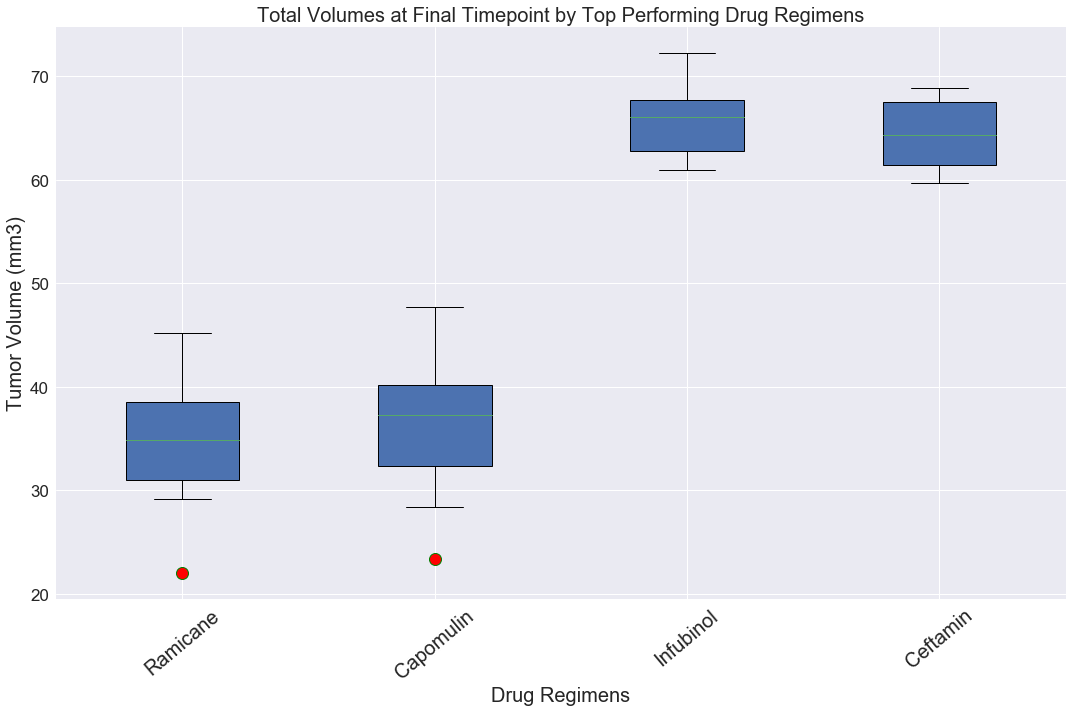

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Sets graph size, creates a list of data for the boxplot and defines aesthetic settings for flierprops 
plt.figure(figsize=(15, 10))
boxplot_data = [Ramicane_array, Capomulin_array, Infubinol_array, Ceftamin_array]
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none', markeredgecolor='g')

#Plots the boxplot
plt.boxplot(boxplot_data, meanline=True, patch_artist=True, whis=1.0, showfliers=True, flierprops=flierprops)

#Add titles and fix fontsizes
plt.title('Total Volumes at Final Timepoint by Top Performing Drug Regimens', fontsize=20)
plt.ylabel('Tumor Volume (mm3)', fontsize=20)
plt.xlabel('Drug Regimens', fontsize=20)
plt.yticks(fontsize=17)

#Fix the xticks position
ticks=np.arange(len(Top_Drug_Regimens))
plt.xticks(1 + ticks, Top_Drug_Regimens, rotation=40 , fontsize=20)

plt.tight_layout()
plt.show()

## Line and Scatter Plots

### >> Line Plot showing timepoint versus Tumor Volume for a single mouse treated with Capomulin

In [43]:
#Filters data for one of the mouse (picked the outlier mouse) treated with Capomulin
Capomulin_sample = filterA.loc[filterA["Mouse ID"]=='s185', :]

#Creates the array values for the tumor volume 
Capomulin_TVolsample = Capomulin_sample["Tumor Volume (mm3)"].values

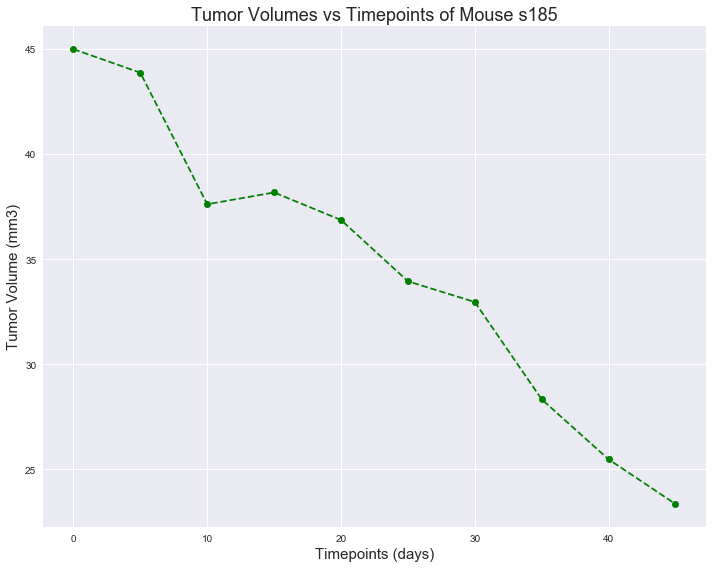

In [44]:
#Set size of graph and x axis range
plt.figure(figsize=(10,8))
line_xaxis = np.arange(start=0, stop=50, step=5)
line_xaxis

#Plot the line graph
plt.plot(line_xaxis, Capomulin_TVolsample, "go--")

#Add titles and modify fontsizes
plt.title('Tumor Volumes vs Timepoints of Mouse s185', fontsize=18)
plt.ylabel('Tumor Volume (mm3)', fontsize=15)
plt.xlabel('Timepoints (days)', fontsize=15)

plt.tight_layout()
plt.show()

#### >> Scatter plot of Mouse Weight & Average Tumor Volume for Capomulin Drug Regimen 

In [45]:
#Creates a new df filtered with Capomulin DR (includes all observed timepoints) data
Capomulin_weight = bestDR_byTVols.loc[bestDR_byTVols["Drug Regimen"]=='Capomulin', :]

In [46]:
#Creates a series of mouse weight grouped by mouse IDs
Cap_weight_scplot = Capomulin_weight.groupby(["Mouse ID"])['Weight (g)'].mean()

#Generates array values of the above series (for scatter plot purposes)
Cap_weight = Cap_weight_scplot.values

In [47]:
#Creates a series of average tumor volumes grouped by mouse IDs
Cap_TVols_scplot = Capomulin_weight.groupby(["Mouse ID"])['Tumor Volume (mm3)'].mean()

#Generates array values of the above series (for scatter plot purposes)
avg_Cap_TVols = Cap_TVols_scplot.values

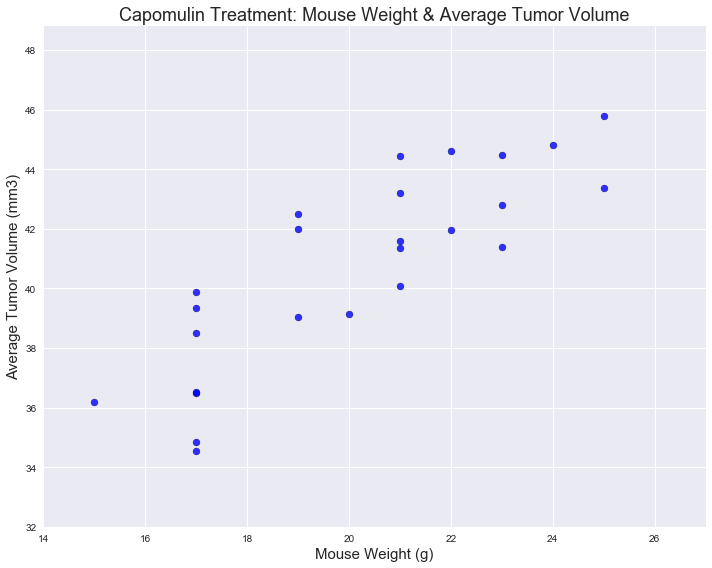

In [48]:
#Sets figure size
plt.figure(figsize=(10,8))

#Plots the scatter plot
plt.scatter(
    Cap_weight, 
    avg_Cap_TVols, 
    marker="o", 
    facecolors="blue", 
    edgecolors="black",
    alpha=0.8
)

#Add titles, modify fontsizes and set x & y axis limits
plt.title('Capomulin Treatment: Mouse Weight & Average Tumor Volume', fontsize=18)
plt.xlabel('Mouse Weight (g)', fontsize=15)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=15)
plt.ylim(32,max(avg_Cap_TVols)+3)
plt.xlim(14,max(Cap_weight)+2)

plt.tight_layout()
plt.show()

## Correlation and Regression

#### >>Correlation Coefficient & Linear Regression Model for Mouse Weight & Tumor Volume for the Capomulin Regimen

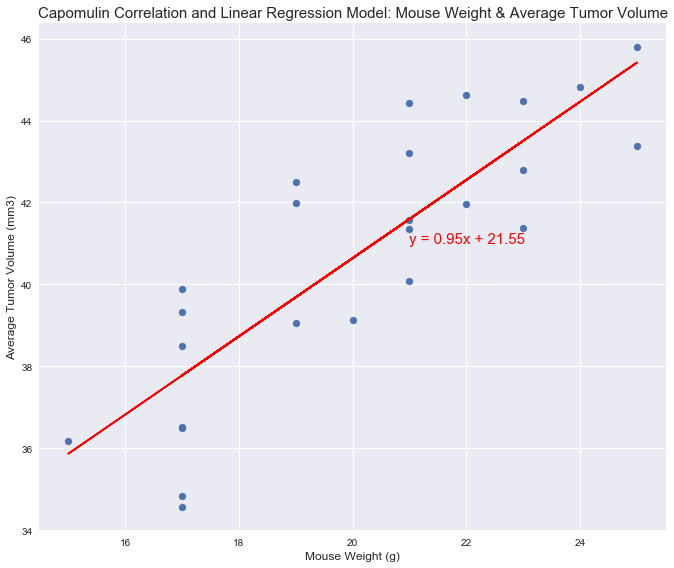

In [49]:
#sets figure size
plt.figure(figsize=(10,8))

# Performs linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Cap_weight, avg_Cap_TVols)   

# Get x/y values for linear regression linear
regress_values = Cap_weight * slope + intercept                                        
regress_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Cap_weight,avg_Cap_TVols)

 # Adds linear regression line to scatter plot
plt.plot(Cap_weight,regress_values,"r-")                                              
plt.annotate(regress_line,(21,41),fontsize=15,color="red")

#Add titles, modify fontsizes and set x & y axis limits
plt.title('Capomulin Correlation and Linear Regression Model: Mouse Weight & Average Tumor Volume', fontsize=15)
plt.xlabel('Mouse Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)

plt.tight_layout()
plt.show()